# Part I

In [1]:
import numpy as np
import pandas as pd
import numpy.linalg as la
import random

import matplotlib.pyplot as plt
%matplotlib inline

In [31]:
def sample(m, n):
    X = np.sign(np.random.uniform(-1, 1, size=(m,n)))
    y = X[:,0]
    
    return X, y

def required_error(test_size, certainty=0.9):
    # Used by each algorithm to calculate the required empirical error for 'converged'
    delta = 1 - certainty
    emp_err = 0.1 - np.sqrt(np.log(1/delta)/(2*test_size))
    
    return emp_err

def sample_complexity(algorithm, max_n=50, test_size=1000):
    mean_comp = np.zeros(max_n)
    std_comp = np.zeros(max_n)  
    
    for n in range(1, max_n+1):
        print("n = ", n)
        this_n = []
        # Average over 10 runs
        for s in range(10):
            X, y = sample(100000, n)
            this_n.append(algorithm(X, y, test_size))
        mean_comp[n-1] = np.mean(this_n)
        std_comp[n-1] = np.std(this_n)
        
        # Plot to get an idea of how the algorithm is doing
        if (n % 10 == 0):
            plt.axhline(0, color='black')
            plt.axvline(0, color='black')
            plt.plot(range(1, n+1), mean_comp[:n], color='blue')
            #plt.errorbar(range(1, n+1), mean_comp[:n], yerr=std_comp[:n], color='blue')
            plt.show()
    
    print(mean_comp)
    print(std_comp)
    plt.axhline(0, color='black')
    plt.axvline(0, color='black')
    plt.plot(range(1,max_n+1), mean_comp, color='blue')
    #plt.errorbar(range(1,max_n+1), mean_comp, yerr=std_comp, color='blue')
    plt.xlabel("n")
    plt.ylabel("m")
    plt.show()
    
    return mean_comp, std_comp

## Perceptron Algorithm

In [32]:
def p_emp_error(size, n, W):
    # Find proportion of errors made when predicting on a sample of size=size
    Xtest, ytest = sample(size, n)
    # Predict on the test-set
    preds = np.sign(Xtest @ W)
    incorrect = np.sum(preds != ytest)
    gen_error = incorrect / size
    
    return gen_error

def perceptron(X, y, test_size):
    m, n = X.shape
    emp_err = []
    converged = False
    W = np.zeros(n)
    count = 0
    
    req_err = required_error(test_size, 0.9)
    
    # Iterate through epochs until convergence
    for epoch in range(10):
        # Iterate through data
        for i in range(m):
            count += 1
            
            xt = X[i,:].T
            yt = y[i]

            # Predict on xt
            yhat = np.sign(W @ xt)
            # Update if mistake
            if (yhat*yt <= 0):
                W += yt*xt

            emp_err.append(p_emp_error(test_size,n,W))
            
            if (len(emp_err) <= 5):
                if all(err <= req_err for err in emp_err):
                    converged = True
                    #print("Converged, with {} samples".format(count))
                    break
            else:
                if all(err <= req_err for err in emp_err[-5:]):
                    converged = True
                    #print("Converged, with {} samples".format(count))
                    break
                    
        if converged: break
    return count

n =  1
n =  2
n =  3
n =  4
n =  5
n =  6
n =  7
n =  8
n =  9
n =  10


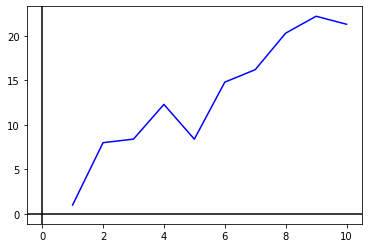

n =  11
n =  12
n =  13
n =  14
n =  15
n =  16
n =  17
n =  18
n =  19
n =  20


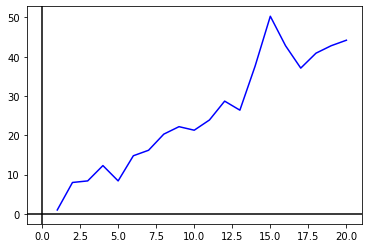

n =  21
n =  22
n =  23
n =  24
n =  25
n =  26
n =  27
n =  28
n =  29
n =  30


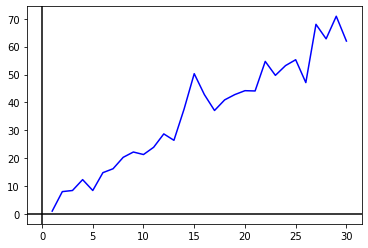

n =  31
n =  32
n =  33
n =  34
n =  35
n =  36
n =  37
n =  38
n =  39
n =  40


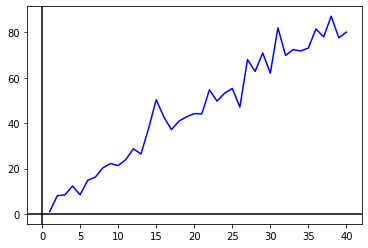

n =  41
n =  42
n =  43
n =  44
n =  45
n =  46
n =  47
n =  48
n =  49
n =  50


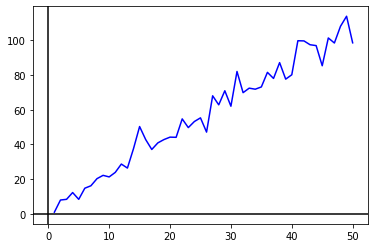

n =  51
n =  52
n =  53
n =  54
n =  55
n =  56
n =  57
n =  58
n =  59
n =  60


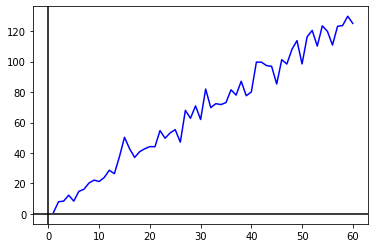

n =  61
n =  62
n =  63
n =  64
n =  65
n =  66
n =  67
n =  68
n =  69
n =  70


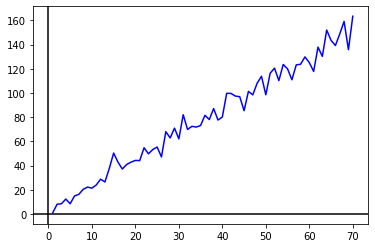

n =  71
n =  72
n =  73
n =  74
n =  75
n =  76
n =  77
n =  78
n =  79
n =  80


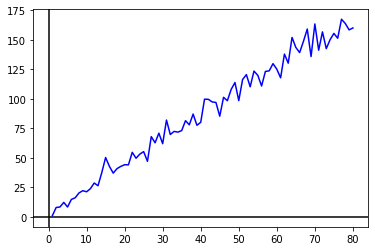

n =  81
n =  82
n =  83
n =  84
n =  85
n =  86
n =  87
n =  88
n =  89
n =  90


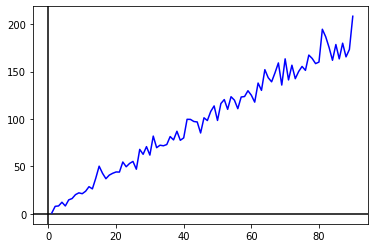

n =  91
n =  92
n =  93
n =  94
n =  95
n =  96
n =  97
n =  98
n =  99
n =  100


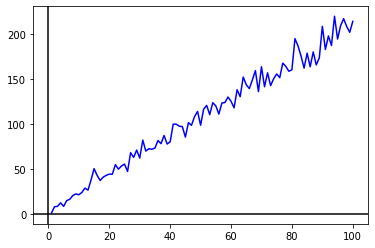

[  1.    8.    8.4  12.3   8.4  14.8  16.2  20.3  22.2  21.3  23.9  28.7
  26.4  37.6  50.3  42.8  37.1  40.9  42.8  44.2  44.1  54.7  49.7  53.2
  55.3  47.1  68.   62.8  70.9  62.   82.   69.8  72.4  71.8  73.1  81.5
  78.   87.1  77.6  80.1  99.7  99.6  97.4  96.9  85.3 101.3  98.4 108.
 113.8  98.5 116.3 120.5 110.2 123.5 119.9 110.9 123.2 123.7 129.8 125.1
 117.8 137.9 130.2 152.  143.5 139.2 148.7 159.1 135.8 163.4 141.2 156.7
 142.5 150.1 155.4 151.3 167.4 163.8 158.4 160.  194.6 186.6 175.3 161.9
 178.5 163.4 179.9 165.5 173.3 208.3 182.6 197.6 187.  219.5 194.2 209.
 216.8 208.1 201.7 213.8]
[ 0.          3.09838668  2.65329983  6.66408283  1.0198039   5.47357287
  3.28024389  8.69540108 11.93147099  4.81767579  9.88382517 15.24499918
  8.55803716  5.33291665 16.43198101 11.31194059 13.10305308 13.51628647
 15.9172862  19.26032191 15.61697794  9.28493403 11.65375476 17.01058494
 11.04581369 14.67957765 26.16103973 12.52836781 16.72991333 14.66969666
 32.89072818 15.48418548 19

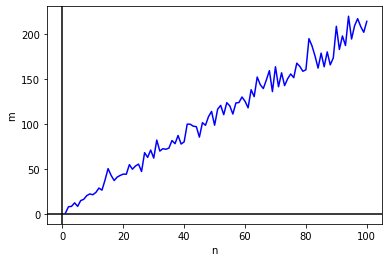

[  1.    8.    8.4  12.3   8.4  14.8  16.2  20.3  22.2  21.3  23.9  28.7
  26.4  37.6  50.3  42.8  37.1  40.9  42.8  44.2  44.1  54.7  49.7  53.2
  55.3  47.1  68.   62.8  70.9  62.   82.   69.8  72.4  71.8  73.1  81.5
  78.   87.1  77.6  80.1  99.7  99.6  97.4  96.9  85.3 101.3  98.4 108.
 113.8  98.5 116.3 120.5 110.2 123.5 119.9 110.9 123.2 123.7 129.8 125.1
 117.8 137.9 130.2 152.  143.5 139.2 148.7 159.1 135.8 163.4 141.2 156.7
 142.5 150.1 155.4 151.3 167.4 163.8 158.4 160.  194.6 186.6 175.3 161.9
 178.5 163.4 179.9 165.5 173.3 208.3 182.6 197.6 187.  219.5 194.2 209.
 216.8 208.1 201.7 213.8] [ 0.          3.09838668  2.65329983  6.66408283  1.0198039   5.47357287
  3.28024389  8.69540108 11.93147099  4.81767579  9.88382517 15.24499918
  8.55803716  5.33291665 16.43198101 11.31194059 13.10305308 13.51628647
 15.9172862  19.26032191 15.61697794  9.28493403 11.65375476 17.01058494
 11.04581369 14.67957765 26.16103973 12.52836781 16.72991333 14.66969666
 32.89072818 15.48418548 19

In [33]:
%%time
## test_size = 10000
p_mean, p_std = sample_complexity(perceptron, 100, 10000)
print(p_mean, p_std)

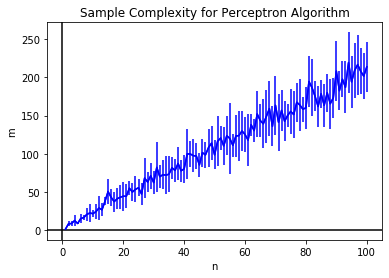

In [34]:
plt.axhline(0, color='black')
plt.axvline(0, color='black')
plt.plot(range(1,101), p_mean, color='blue')
plt.errorbar(range(1,101), p_mean, yerr=p_std, color='blue')
plt.xlabel("n")
plt.ylabel("m")
plt.title("Sample Complexity for Perceptron Algorithm")
plt.show()

## Winnow Algorithm

In [35]:
def w_emp_error(size, n, W):
    Xtest, ytest = sample(size, n)
    ## Told to change to {0,1}, to keep with lecture notes
    Xtest = np.where(Xtest == -1, 0, Xtest)
    ytest = np.where(ytest == -1, 0, ytest)
    
    preds = np.sign(Xtest @ W - n)
    preds = np.where(preds == 0, 1, preds)
    preds = np.where(preds == -1, 0, preds)
    
    incorrect = np.sum(preds != ytest)
    emp_error = incorrect / size
    
    return emp_error

def winnow(X, y, test_size):
    ## Told to change to {0,1}, to keep with lecture notes
    X = np.where(X == -1, 0, X)
    y = np.where(y == -1, 0, y)
    
    m, n = X.shape
    emp_err = []
    converged = False    
    W = np.ones(n)
    count = 0
    
    req_err = required_error(test_size, 0.9)
    
    for epoch in range(10):
        for i in range(m):
            count += 1
            
            xt = X[i,:].T
            yt = y[i]
            
            # Predict for this xt
            if (W @ xt < n):
                yhat = 0
            else:
                yhat = 1
                
            # Update if mistake
            if (yhat != yt):
                for j in range(n):
                    W[j] *= 2**(xt[j]*(yt-yhat)) 

            emp_err.append(w_emp_error(test_size,n,W))
            
            if (len(emp_err) <= 5):
                if all(err <= req_err for err in emp_err):
                    converged = True
                    #print("Converged, with {} samples".format(count))
                    break
            else:
                if all(err <= req_err for err in emp_err[-5:]):
                    converged = True
                    #print("Converged, with {} samples".format(count))
                    break
        if converged: break
    return count

n =  1
n =  2
n =  3
n =  4
n =  5
n =  6
n =  7
n =  8
n =  9
n =  10


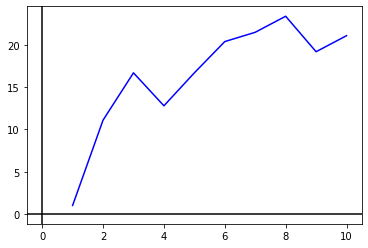

n =  11
n =  12
n =  13
n =  14
n =  15
n =  16
n =  17
n =  18
n =  19
n =  20


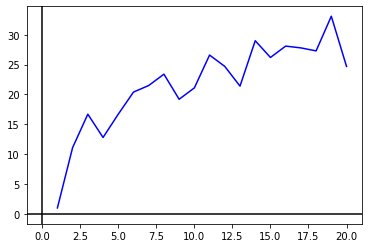

n =  21
n =  22
n =  23
n =  24
n =  25
n =  26
n =  27
n =  28
n =  29
n =  30


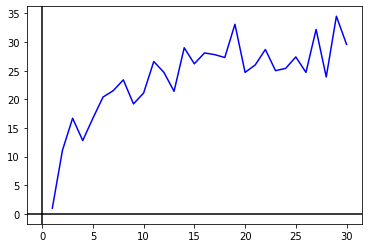

n =  31
n =  32
n =  33
n =  34
n =  35
n =  36
n =  37
n =  38
n =  39
n =  40


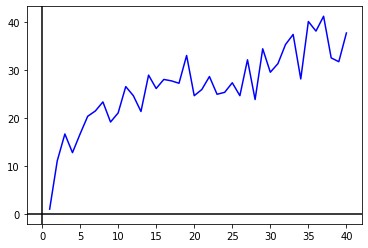

n =  41
n =  42
n =  43
n =  44
n =  45
n =  46
n =  47
n =  48
n =  49
n =  50


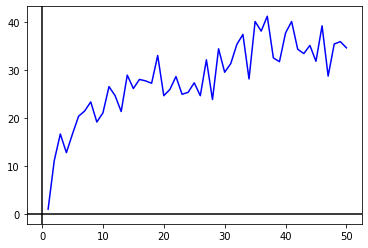

n =  51
n =  52
n =  53
n =  54
n =  55
n =  56
n =  57
n =  58
n =  59
n =  60


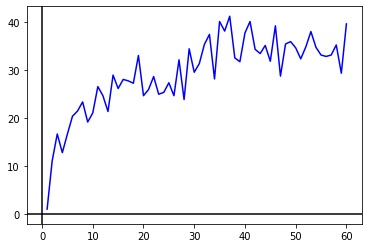

n =  61
n =  62
n =  63
n =  64
n =  65
n =  66
n =  67
n =  68
n =  69
n =  70


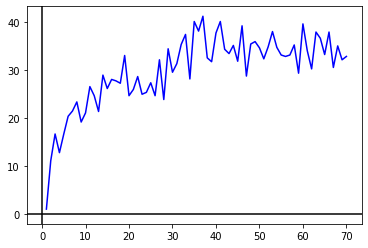

n =  71
n =  72
n =  73
n =  74
n =  75
n =  76
n =  77
n =  78
n =  79
n =  80


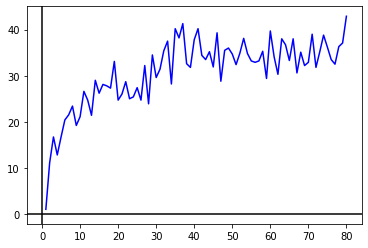

n =  81
n =  82
n =  83
n =  84
n =  85
n =  86
n =  87
n =  88
n =  89
n =  90


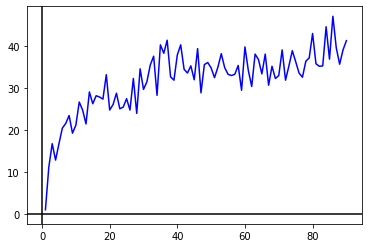

n =  91
n =  92
n =  93
n =  94
n =  95
n =  96
n =  97
n =  98
n =  99
n =  100


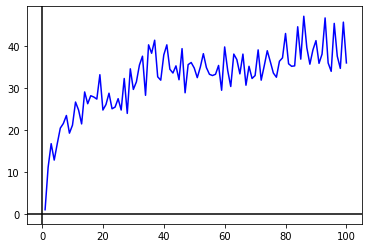

[ 1.  11.1 16.7 12.8 16.7 20.4 21.5 23.4 19.2 21.1 26.6 24.7 21.4 29.
 26.2 28.1 27.8 27.3 33.1 24.7 26.  28.7 25.  25.4 27.4 24.7 32.2 23.9
 34.5 29.6 31.4 35.4 37.5 28.2 40.2 38.2 41.3 32.6 31.8 37.8 40.2 34.4
 33.5 35.2 31.9 39.3 28.8 35.5 36.  34.7 32.4 34.9 38.1 34.8 33.2 32.9
 33.2 35.3 29.4 39.7 34.1 30.3 38.  36.7 33.3 38.  30.6 35.1 32.2 32.9
 39.  31.8 35.2 38.8 36.2 33.5 32.5 36.3 37.1 42.9 35.7 35.1 35.2 44.5
 36.8 47.  39.5 35.6 39.  41.2 35.8 38.  46.6 35.9 33.9 45.3 37.5 34.6
 45.6 35.9]
[ 0.          5.10783712  4.62709412  4.14246304  6.82715168  5.81721583
  7.61905506 11.60344776  4.48998886  9.00499861  8.17557337 10.45035885
  7.35119038  7.56306816  8.84081444 12.01207726 11.50478161  7.59012516
 17.6547444   7.77238702  8.47348807  6.85638389 11.61895004  7.77431669
  6.85857128  6.66408283 10.09752445  5.62938718 15.23975065 10.59433811
 10.95627674 11.16422859 17.17701953  7.53392328 15.76578574 14.56571316
 11.86633895  7.39188745  7.05407684 13.37011593 10.32

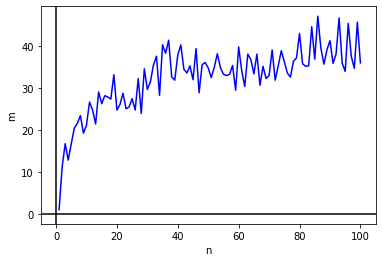

[ 1.  11.1 16.7 12.8 16.7 20.4 21.5 23.4 19.2 21.1 26.6 24.7 21.4 29.
 26.2 28.1 27.8 27.3 33.1 24.7 26.  28.7 25.  25.4 27.4 24.7 32.2 23.9
 34.5 29.6 31.4 35.4 37.5 28.2 40.2 38.2 41.3 32.6 31.8 37.8 40.2 34.4
 33.5 35.2 31.9 39.3 28.8 35.5 36.  34.7 32.4 34.9 38.1 34.8 33.2 32.9
 33.2 35.3 29.4 39.7 34.1 30.3 38.  36.7 33.3 38.  30.6 35.1 32.2 32.9
 39.  31.8 35.2 38.8 36.2 33.5 32.5 36.3 37.1 42.9 35.7 35.1 35.2 44.5
 36.8 47.  39.5 35.6 39.  41.2 35.8 38.  46.6 35.9 33.9 45.3 37.5 34.6
 45.6 35.9] [ 0.          5.10783712  4.62709412  4.14246304  6.82715168  5.81721583
  7.61905506 11.60344776  4.48998886  9.00499861  8.17557337 10.45035885
  7.35119038  7.56306816  8.84081444 12.01207726 11.50478161  7.59012516
 17.6547444   7.77238702  8.47348807  6.85638389 11.61895004  7.77431669
  6.85857128  6.66408283 10.09752445  5.62938718 15.23975065 10.59433811
 10.95627674 11.16422859 17.17701953  7.53392328 15.76578574 14.56571316
 11.86633895  7.39188745  7.05407684 13.37011593 10.32

In [36]:
%%time
## test_size = 10000
w_mean, w_std = sample_complexity(winnow, 100, 10000)
print(w_mean, w_std)

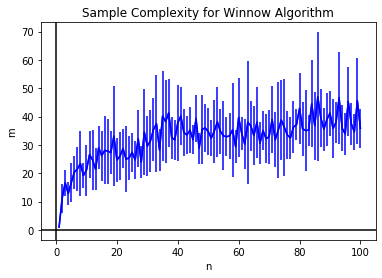

In [37]:
plt.axhline(0, color='black')
plt.axvline(0, color='black')
plt.plot(range(1,101), w_mean, color='blue')
plt.errorbar(range(1,101), w_mean, yerr=w_std, color='blue')
plt.xlabel("n")
plt.ylabel("m")
plt.title("Sample Complexity for Winnow Algorithm")
plt.show()

## Least Squares Algorithm

In [38]:
def ls_emp_error(size, n, W):
    Xtest, ytest = sample(size, n)
    preds = np.sign(Xtest @ W)
    incorrect = np.sum(preds != ytest)
    emp_error = incorrect / size
    
    return emp_error

def least_squares(X, y, test_size):
    m, n = X.shape    
    emp_err = []
    converged = False
    W = np.ones(n)
    count = 0
    
    req_err = required_error(test_size, 0.9)  
    
    for epoch in range(10):
        for i in range(m):
            count += 1
            
            xs = X[:i+1,:]
            ys = y[:i+1]
            
            W = la.pinv(xs) @ ys

            emp_err.append(ls_emp_error(test_size,n,W))
            
            if (len(emp_err) <= 5):
                if all(err <= req_err for err in emp_err):
                    converged = True
                    #print("Converged, with {} samples".format(count))
                    break
            else:
                if all(err <= req_err for err in emp_err[-5:]):
                    converged = True
                    #print("Converged, with {} samples".format(count))
                    break
                
        if converged: break
    return count

n =  1
n =  2
n =  3
n =  4
n =  5
n =  6
n =  7
n =  8
n =  9
n =  10


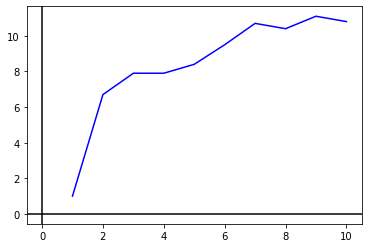

n =  11
n =  12
n =  13
n =  14
n =  15
n =  16
n =  17
n =  18
n =  19
n =  20


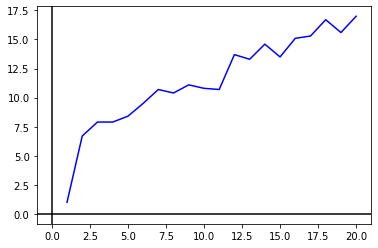

n =  21
n =  22
n =  23
n =  24
n =  25
n =  26
n =  27
n =  28
n =  29
n =  30


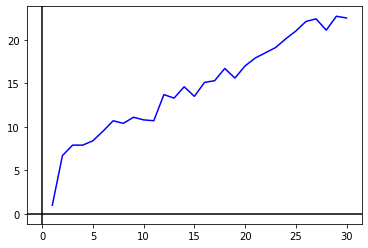

n =  31
n =  32
n =  33
n =  34
n =  35
n =  36
n =  37
n =  38
n =  39
n =  40


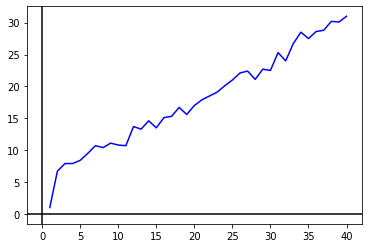

n =  41
n =  42
n =  43
n =  44
n =  45
n =  46
n =  47
n =  48
n =  49
n =  50


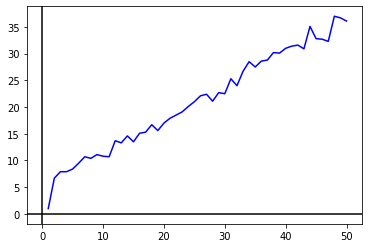

n =  51
n =  52
n =  53
n =  54
n =  55
n =  56
n =  57
n =  58
n =  59
n =  60


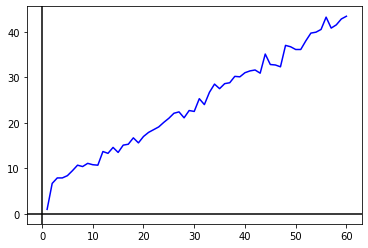

n =  61
n =  62
n =  63
n =  64
n =  65
n =  66
n =  67
n =  68
n =  69
n =  70


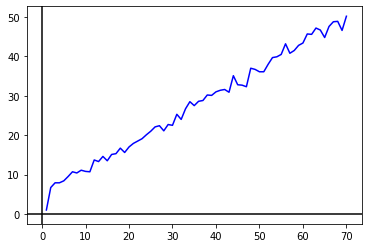

n =  71
n =  72
n =  73
n =  74
n =  75
n =  76
n =  77
n =  78
n =  79
n =  80


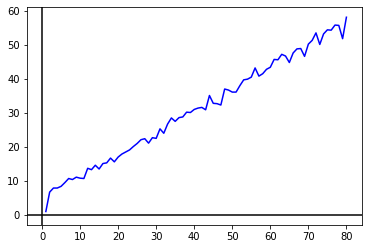

n =  81
n =  82
n =  83
n =  84
n =  85
n =  86
n =  87
n =  88
n =  89
n =  90


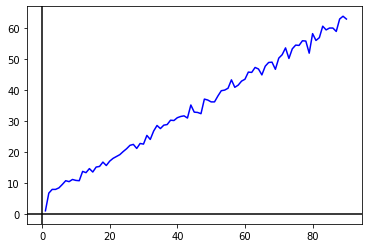

n =  91
n =  92
n =  93
n =  94
n =  95
n =  96
n =  97
n =  98
n =  99
n =  100


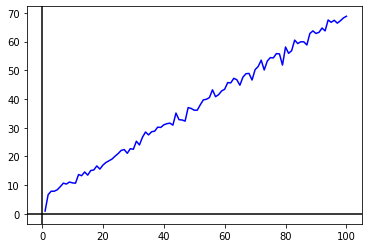

[ 1.   6.7  7.9  7.9  8.4  9.5 10.7 10.4 11.1 10.8 10.7 13.7 13.3 14.6
 13.5 15.1 15.3 16.7 15.6 17.  17.9 18.5 19.1 20.1 21.  22.1 22.4 21.1
 22.7 22.5 25.3 24.  26.7 28.5 27.5 28.6 28.8 30.2 30.1 31.  31.4 31.6
 30.9 35.1 32.8 32.7 32.3 37.  36.7 36.1 36.1 38.  39.7 39.9 40.5 43.2
 40.8 41.5 42.8 43.4 45.7 45.6 47.2 46.7 44.8 47.6 48.8 48.9 46.6 50.2
 51.3 53.5 50.1 53.2 54.4 54.3 55.8 55.7 51.8 58.1 55.9 56.8 60.5 59.3
 59.9 59.9 58.8 62.8 63.7 62.8 63.2 64.7 63.7 67.5 66.7 67.4 66.4 67.2
 68.2 68.8]
[0.         1.55241747 1.81383571 1.64012195 2.05912603 2.33452351
 1.73493516 1.11355287 1.92093727 1.32664992 1.73493516 1.26885775
 1.95192213 2.41660919 1.36014705 2.62488095 2.19317122 1.61554944
 2.10713075 2.04939015 1.92093727 1.85741756 2.80891438 3.01496269
 2.48997992 2.11896201 2.2        2.91376046 2.83019434 4.29534632
 3.25729949 2.64575131 3.60693776 2.97489496 3.72155881 2.93938769
 4.35430821 3.37045991 3.85875628 2.36643191 2.72763634 2.90516781
 2.42693222 3.64554523

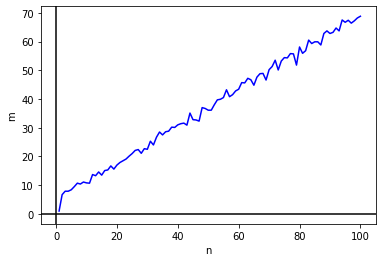

[ 1.   6.7  7.9  7.9  8.4  9.5 10.7 10.4 11.1 10.8 10.7 13.7 13.3 14.6
 13.5 15.1 15.3 16.7 15.6 17.  17.9 18.5 19.1 20.1 21.  22.1 22.4 21.1
 22.7 22.5 25.3 24.  26.7 28.5 27.5 28.6 28.8 30.2 30.1 31.  31.4 31.6
 30.9 35.1 32.8 32.7 32.3 37.  36.7 36.1 36.1 38.  39.7 39.9 40.5 43.2
 40.8 41.5 42.8 43.4 45.7 45.6 47.2 46.7 44.8 47.6 48.8 48.9 46.6 50.2
 51.3 53.5 50.1 53.2 54.4 54.3 55.8 55.7 51.8 58.1 55.9 56.8 60.5 59.3
 59.9 59.9 58.8 62.8 63.7 62.8 63.2 64.7 63.7 67.5 66.7 67.4 66.4 67.2
 68.2 68.8] [0.         1.55241747 1.81383571 1.64012195 2.05912603 2.33452351
 1.73493516 1.11355287 1.92093727 1.32664992 1.73493516 1.26885775
 1.95192213 2.41660919 1.36014705 2.62488095 2.19317122 1.61554944
 2.10713075 2.04939015 1.92093727 1.85741756 2.80891438 3.01496269
 2.48997992 2.11896201 2.2        2.91376046 2.83019434 4.29534632
 3.25729949 2.64575131 3.60693776 2.97489496 3.72155881 2.93938769
 4.35430821 3.37045991 3.85875628 2.36643191 2.72763634 2.90516781
 2.42693222 3.64554523

In [39]:
%%time
# test_size = 10000
ls_mean, ls_std = sample_complexity(least_squares, 100, 10000)
print(ls_mean, ls_std)

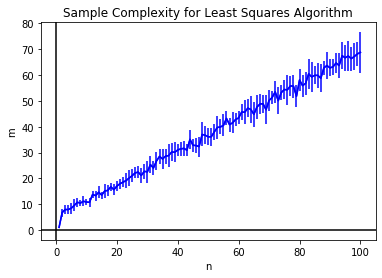

In [40]:
plt.axhline(0, color='black')
plt.axvline(0, color='black')
plt.plot(range(1,101), ls_mean, color='blue')
plt.errorbar(range(1,101), ls_mean, yerr=ls_std, color='blue')
plt.xlabel("n")
plt.ylabel("m")
plt.title("Sample Complexity for Least Squares Algorithm")
plt.show()

## 1-NN Algorithm

In [12]:
def nn_emp_error(size, n, xs, ys):
    Xtest, ytest = sample(size, n)
    incorrect = 0
    
    for i in range(size):
        pred = nn_predict(Xtest[i,:], xs, ys)
        if (pred != ytest[i]):
            incorrect += 1
    
    emp_error = incorrect / size
    return emp_error

def nn_predict(this_x, xs, ys):
    m, n = xs.shape
    all_dists = np.zeros(m)
    
    repeated_x = np.array([this_x]*m)
    diff_mat = xs - repeated_x
    all_dists = la.norm(diff_mat, axis=1)
        
    # Find index of x in xs closest to this_x
    min_idx = np.array(np.where(all_dists == min(all_dists)))[0]

    if (len(min_idx) > 1):
        # If several points are of equal shortest distance, take the mode
        pred = np.sign(np.sum(ys[min_idx]))
        
        # If there are as many (+1)s as (-1)s, choose at random:
        if (pred == 0):
            min_idx = random.choice(min_idx)
            pred = ys[min_idx]        
    else:
        pred = ys[min_idx]
    
    return pred


def nearest_neighbour(X, y, test_size):
    m, n = X.shape    
    emp_err = []
    converged = False
    
    req_err = required_error(test_size, 0.9)  
    
    for i in range(m):
        xs = X[:i+1,:]
        ys = y[:i+1]

        emp_err.append(nn_emp_error(test_size,n,xs,ys))

        if (len(emp_err) <= 5):
            if all(err <= req_err for err in emp_err):
                converged = True
                #print("NN Converged, with {} samples".format(i+1))
                break
        else:
            if all(err <= req_err for err in emp_err[-5:]):
                converged = True
                #print("NN Converged, with {} samples".format(i+1))
                break

    return i+1

n =  1
n =  2
n =  3
n =  4
n =  5
n =  6
n =  7
n =  8
n =  9
n =  10


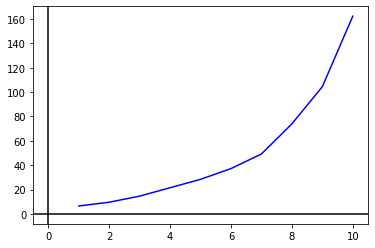

n =  11
n =  12
n =  13
n =  14
n =  15
[  6.5   9.6  14.6  21.5  28.4  37.2  49.2  73.9 104.4 162.2 193.2 307.2
 441.7 637.8 964.4]
[ 1.02469508  2.4979992   4.00499688  8.2127949   8.05232886  7.8460181
 10.52425769 21.34221169 20.63589106 29.11975275 17.30780171 35.37174013
 35.27336105 43.97226399 33.92403278]


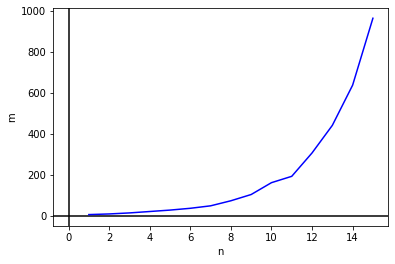

[  6.5   9.6  14.6  21.5  28.4  37.2  49.2  73.9 104.4 162.2 193.2 307.2
 441.7 637.8 964.4] [ 1.02469508  2.4979992   4.00499688  8.2127949   8.05232886  7.8460181
 10.52425769 21.34221169 20.63589106 29.11975275 17.30780171 35.37174013
 35.27336105 43.97226399 33.92403278]
Wall time: 1h 47min 11s


In [45]:
%%time
## max_m = 15
## test_size = 1000
nn_mean15, nn_std15 = sample_complexity(nearest_neighbour, 15, 1000)
print(nn_mean15, nn_std15)

In [4]:
nn_mean15, nn_std15 = [6.5, 9.6, 14.6, 21.5, 28.4, 37.2, 49.2, 73.9, 104.4, 162.2, 193.2, 307.2,
 441.7, 637.8, 964.4], [ 1.02469508,  2.4979992,   4.00499688,  8.2127949,   8.05232886,  7.8460181,
 10.52425769, 21.34221169, 20.63589106, 29.11975275, 17.30780171, 35.37174013,
 35.27336105, 43.97226399, 33.92403278]

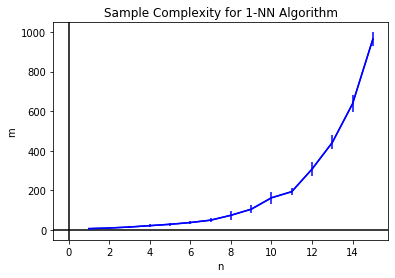

In [51]:
plt.axhline(0, color='black')
plt.axvline(0, color='black')
plt.plot(range(1,16), nn_mean15, color='blue')
plt.errorbar(range(1,16), nn_mean15, yerr=nn_std15, color='blue')
plt.xlabel("n")
plt.ylabel("m")
plt.title("Sample Complexity for 1-NN Algorithm")
plt.show()

## Sample Complexity

Perceptron: Theta(n)

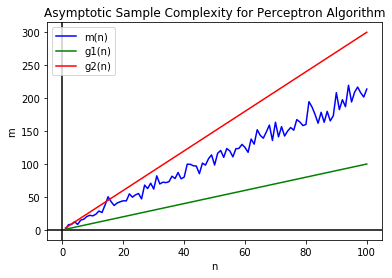

In [42]:
x = np.linspace(1,100, 100)
g1 = x
g2 = 3*x

plt.axhline(0, color='black')
plt.axvline(0, color='black')
plt.plot(x, p_mean, color='blue', label='m(n)')
plt.plot(x, g1, color='green', label='g1(n)')
plt.plot(x, g2, color='red', label='g2(n)')
#plt.errorbar(range(1,101), p_mean, yerr=p_std, color='blue')
plt.xlabel("n")
plt.ylabel("m")
plt.title("Asymptotic Sample Complexity for Perceptron Algorithm")
plt.legend(loc='upper left')
plt.show()

Winnow: Theta(log(n))

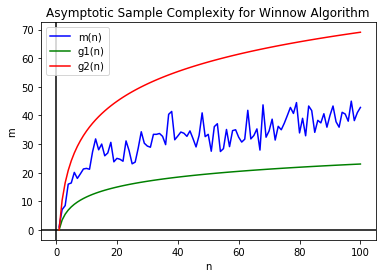

In [93]:
x = np.linspace(1,100, 100)
g1 = 5*np.log(x)
g2 = 15*np.log(x)

plt.axhline(0, color='black')
plt.axvline(0, color='black')
plt.plot(x, w_mean, color='blue', label='m(n)')
#plt.errorbar(range(1,101), w_mean, yerr=w_std, color='blue')
plt.plot(x, g1, color='green', label='g1(n)')
plt.plot(x, g2, color='red', label='g2(n)')
plt.xlabel("n")
plt.ylabel("m")
plt.title("Asymptotic Sample Complexity for Winnow Algorithm")
plt.legend(loc='upper left')
plt.show()

Least Squares: Theta(n)

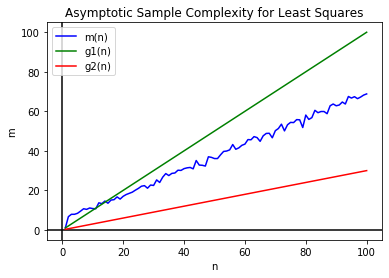

In [44]:
x = np.linspace(1,100, 100)
g1 = x
g2 = 0.3*x

plt.axhline(0, color='black')
plt.axvline(0, color='black')
plt.plot(x, ls_mean, color='blue', label='m(n)')
#plt.errorbar(range(1,101), ls_mean, yerr=ls_std, color='blue')
plt.plot(x, g1, color='green', label='g1(n)')
plt.plot(x, g2, color='red', label='g2(n)')
plt.xlabel("n")
plt.ylabel("m")
plt.title("Asymptotic Sample Complexity for Least Squares")
plt.legend(loc='upper left')
plt.show()

## Attempt to find Sample Complexity for 1-NN; n > 15:

Note: we kept having problems with running 1-NN for too long, so have taken this approach in hope to increase what maximum value of n we can go up to.

In [10]:
def individual_sample_complexity(algorithm, this_n, test_size=1000):
    print("n = ", this_n)
    comps = []
    # Average over 10 runs
    for s in range(10):
        X, y = sample(100000, this_n)
        comps.append(algorithm(X, y, test_size))
    mean_comp = np.mean(comps)
    std_comp = np.std(comps)
    
    print(mean_comp)
    print(std_comp)
    print()
    
    return mean_comp, std_comp

In [13]:
nn_means = []
nn_stds = []

for this_n in range(16,17):
    %time this_mean, this_std = individual_sample_complexity(nearest_neighbour, this_n, 1000)
    print()
    nn_means.append(this_mean)
    nn_stds.append(this_std)

n =  16
1446.1
112.83567698206095

Wall time: 1h 56min



In [20]:
# We take the means and stds as learned for up to n=15, and add that found for n=16
nn_mean16, nn_std16 = [6.5, 9.6, 14.6, 21.5, 28.4, 37.2, 49.2, 73.9, 104.4, 162.2, 193.2, 307.2,
 441.7, 637.8, 964.4, 1446.1], [ 1.02469508,  2.4979992,   4.00499688,  8.2127949,   8.05232886,  7.8460181,
 10.52425769, 21.34221169, 20.63589106, 29.11975275, 17.30780171, 35.37174013,
 35.27336105, 43.97226399, 33.92403278, 112.83567698206095]

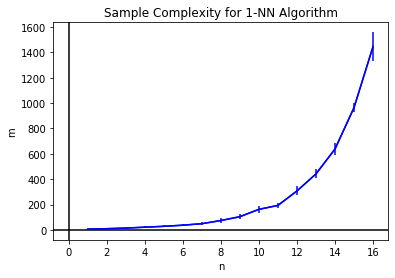

In [21]:
plt.axhline(0, color='black')
plt.axvline(0, color='black')
plt.plot(range(1,17), nn_mean16, color='blue')
plt.errorbar(range(1,17), nn_mean16, yerr=nn_std16, color='blue')
plt.xlabel("n")
plt.ylabel("m")
plt.title("Sample Complexity for 1-NN Algorithm")
plt.show()

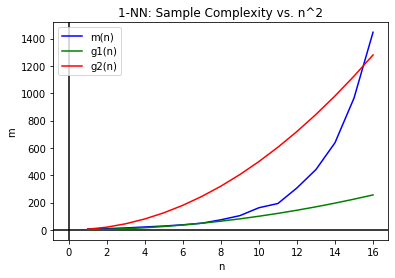

In [45]:
x = np.linspace(1,16, 16)
g1 = x**2
g2 = 5*x**2

plt.axhline(0, color='black')
plt.axvline(0, color='black')
plt.plot(x, nn_mean16, color='blue', label='m(n)')
#plt.errorbar(x, nn_mean16, yerr=nn_std16, color='blue')
plt.plot(x, g1, color='green', label='g1(n)')
plt.plot(x, g2, color='red', label='g2(n)')
plt.xlabel("n")
plt.ylabel("m")
plt.title("1-NN: Sample Complexity vs. n^2")
plt.legend(loc='upper left')
plt.show()

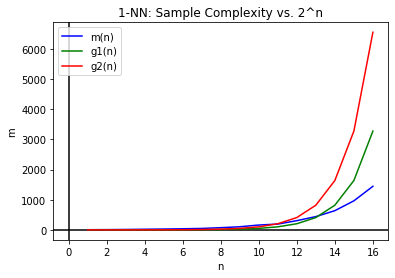

In [46]:
x = np.linspace(1,16, 16)
g1 = 0.05*2**x
g2 = 0.1*2**x

plt.axhline(0, color='black')
plt.axvline(0, color='black')
plt.plot(x, nn_mean16, color='blue', label='m(n)')
#plt.errorbar(x, nn_mean16, yerr=nn_std16, color='blue')
plt.plot(x, g1, color='green', label='g1(n)')
plt.plot(x, g2, color='red', label='g2(n)')
plt.xlabel("n")
plt.ylabel("m")
plt.title("1-NN: Sample Complexity vs. 2^n")
plt.legend(loc='upper left')
plt.show()